# Setup

In [1]:
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter as SMF
import numpy as np
from random import randint as ri
import seaborn as sns
import statistics

In [2]:
#Explicit definition.
def EV1(c, g):
    
    if c > g:
        #Any competitor whose place is greater than the number of steps will have enough information to always cross.
        ev = c-g
        c = g
    
    else :
        ev = 0
    
    #The number of deaths can be anywhere from 0 to the number of competitors.
    for d in range(0, c+1):
        #(Possibility of d deaths among the g steps)*(probability of steps breaking or holding)*(number of survivors)
        ev += math.comb(g, d) * ((0.5) ** g) * (c - d)
    
    return(ev)

#Recursive definition
def EV2(c, g):
    
    if c == 0 :
        #No one is left, everyone died. ¯|_( ͡°ʖ ͡°)_|¯
        return(0)
    
    elif g == 0 :
        #No steps are left, everyone remaining wins.
        return(c)
      
    else:
        #Half the time the current competitor will die on the current step, leaving the c-1 players and g-1 steps.
        #Half the time the current competitor will live on the current step, leaving the c players and g-1 steps.
        
        return(0.5 * (EV2(c-1, g-1) + EV2(c, g-1)))


In [3]:
EV1(16, 18)

7.0000762939453125

In [4]:
EV2(16, 18)

7.0000762939453125

In [5]:
#Returns the number of survivors for c competitors and g glass steps.
def squid(c, g) :
    
    if c == 0 :
        #No one is left, everyone died. ¯|_( ͡°ʖ ͡°)_|¯
        return(0)
    
    if g == 0 :
        #No steps left, everyone remaining wins.
        return(c)
      
    else:
        #Current competitor lives or dies on current step.
        survives = ri(0,1)
        
        if survives == 0 :
            #There is one less competitor, and there is essentially one less step.
            return(squid(c-1, g-1))
        
        else :
            #There is essentially one less step for all competitors.
            return(squid(c, g-1))

In [6]:
#Set will collect the number of surivors from each of 100,000,000 runs.
competitors = []
for run in range(100000000):
    competitors.append(squid(16,18))   

In [7]:
#Average of 100,000,000 simulations.
mean = round(statistics.mean(competitors), 5)
mean

7.00007

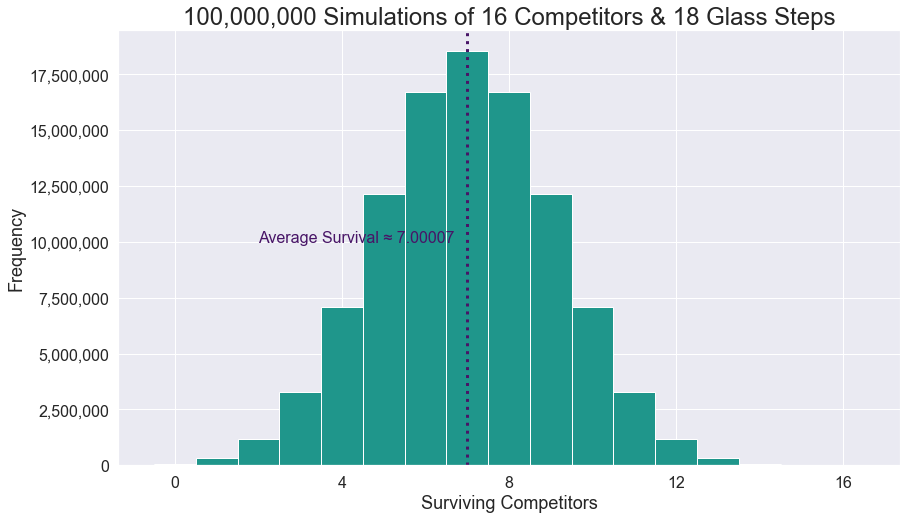

In [8]:
#Plot.
sns.set()
fig = plt.figure(figsize = (14, 8))
ax = fig.add_subplot()

#Histogram.
plt.hist(x = competitors,
         #Number of bins.
         bins = np.arange(len(set(competitors)) + 1) + min(set(competitors)) - 0.5,
         align = "mid",
         color = '#1F968B')

#Average value vertical line.
plt.axvline(x = mean,
            ls = ":",
            lw = 3,
            c = '#481567')

#Title.
ax.set_title("100,000,000 Simulations of 16 Competitors & 18 Glass Steps", fontsize = 24)

#Axes.
ax.set_xlabel("Surviving Competitors", fontsize = 18)
ax.set_ylabel("Frequency", fontsize = 18)
ax.yaxis.set_major_formatter(SMF('{x:,.0f}'))
ax.tick_params(axis = 'both', labelsize = 16)
plt.xticks(ticks = [0,4,8,12,16], labels = [0,4,8,12,16])

#Vertical line text.
ax.annotate('Average Survival ≈ {}'.format(mean),
            xy = (mean - 5, 10000000),
            xytext = (mean - 5, 10000000),
            fontsize = 16,
            color = '#481567');

fig.savefig("2021.10.29 Classic1.png")

#### Rohan Lewis 

#### 2021.10.29